In [1]:
import torch
import pandas as pd
import numpy as np
import sys, time

import torch.nn as nn
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torchvision.utils import make_grid


import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os

In [3]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

SEED = 999
torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

cuda:0


# 1) ETL

In [4]:
imageSize = 100

In [5]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((imageSize, imageSize)),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

In [6]:
DIR = './Plant_leave_diseases_dataset_with_augmentation/'
plantVillDataset = datasets.ImageFolder(DIR, transform=transform)
plantVillDataset

Dataset ImageFolder
    Number of datapoints: 61486
    Root location: ./Plant_leave_diseases_dataset_with_augmentation/
    StandardTransform
Transform: Compose(
               ToTensor()
               Resize(size=(100, 100), interpolation=bilinear, max_size=None, antialias=None)
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )

# 2) EDA

#### Image Sample

In [7]:
classNames = list(plantVillDataset.class_to_idx)

In [8]:
def displayImage(img):
    img = img / 2 + 0.5
    plt.imshow(transforms.ToPILImage()(img))

torch.Size([3, 100, 100])


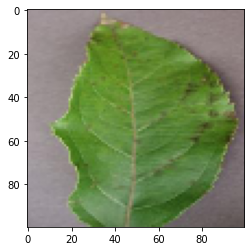

In [9]:
for temp in plantVillDataset:
    print(temp[0].shape)
    displayImage(temp[0])
    break

In [10]:
def show_sample_images(dataset):
    loader = DataLoader(dataset, batch_size = 12, shuffle=True)
    batch = next(iter(loader))
    images, labels = batch
    
    grid = make_grid(images, nrow = 6)
    grid = grid / 2 + 0.5 # unnormalize image
    im_transpose = np.transpose(grid, (1, 2, 0)) 
    plt.figure(figsize=(11, 11))
    plt.imshow(im_transpose)
    print('Encoded Labels: ', labels)
    print('Labels:')
    for label in labels:
        print(classNames[label])

Encoded Labels:  tensor([26, 36, 20, 17, 25,  1, 14, 34, 31, 13,  8,  7])
Labels:
Squash___Powdery_mildew
Tomato___Tomato_Yellow_Leaf_Curl_Virus
Pepper,_bell___healthy
Peach___Bacterial_spot
Soybean___healthy
Apple___Black_rot
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
Tomato___Spider_mites Two-spotted_spider_mite
Tomato___Late_blight
Grape___Esca_(Black_Measles)
Corn___Cercospora_leaf_spot Gray_leaf_spot
Cherry___healthy


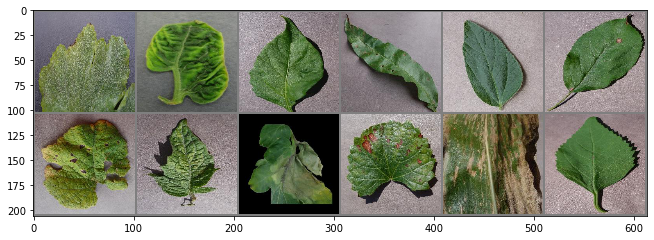

In [11]:
show_sample_images(plantVillDataset)

#### Checking if dataset is balanced

In [12]:
# getting labels/targets
classNames = list(plantVillDataset.class_to_idx)
classNames

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Background_without_leaves',
 'Blueberry___healthy',
 'Cherry___Powdery_mildew',
 'Cherry___healthy',
 'Corn___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn___Common_rust',
 'Corn___Northern_Leaf_Blight',
 'Corn___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot'

In [13]:
# counting no. of each label
labels, noOfImagesPerClass = torch.unique(torch.tensor(plantVillDataset.targets), return_counts=True)

In [14]:
classCount =  pd.DataFrame({'class': labels, 'count': noOfImagesPerClass})

In [15]:
classCount.head()

class  count
0      0   1000
1      1   1000
2      2   1000
3      3   1645
4      4   1143

In [16]:
for index, i in enumerate(range(len(noOfImagesPerClass))):
    print(f"{index} {classNames[i]}: {noOfImagesPerClass[i]}")

0 Apple___Apple_scab: 1000
1 Apple___Black_rot: 1000
2 Apple___Cedar_apple_rust: 1000
3 Apple___healthy: 1645
4 Background_without_leaves: 1143
5 Blueberry___healthy: 1502
6 Cherry___Powdery_mildew: 1052
7 Cherry___healthy: 1000
8 Corn___Cercospora_leaf_spot Gray_leaf_spot: 1000
9 Corn___Common_rust: 1192
10 Corn___Northern_Leaf_Blight: 1000
11 Corn___healthy: 1162
12 Grape___Black_rot: 1180
13 Grape___Esca_(Black_Measles): 1383
14 Grape___Leaf_blight_(Isariopsis_Leaf_Spot): 1076
15 Grape___healthy: 1000
16 Orange___Haunglongbing_(Citrus_greening): 5507
17 Peach___Bacterial_spot: 2297
18 Peach___healthy: 1000
19 Pepper,_bell___Bacterial_spot: 1000
20 Pepper,_bell___healthy: 1478
21 Potato___Early_blight: 1000
22 Potato___Late_blight: 1000
23 Potato___healthy: 1000
24 Raspberry___healthy: 1000
25 Soybean___healthy: 5090
26 Squash___Powdery_mildew: 1835
27 Strawberry___Leaf_scorch: 1109
28 Strawberry___healthy: 1000
29 Tomato___Bacterial_spot: 2127
30 Tomato___Early_blight: 1000
31 Tomat

<AxesSubplot:xlabel='class', ylabel='count'>

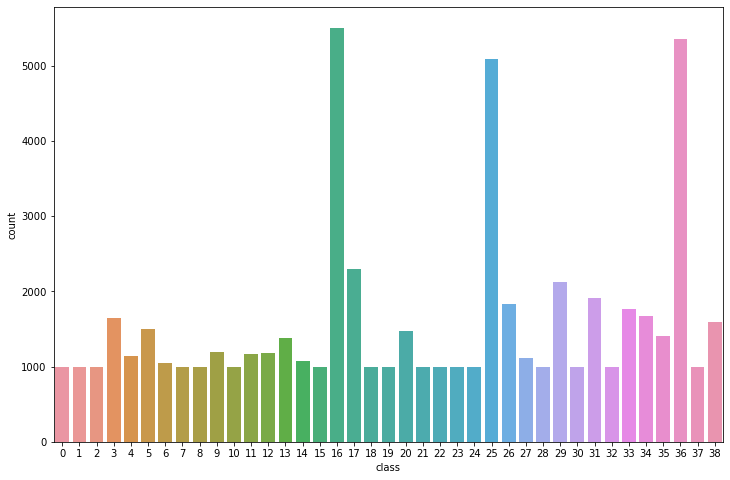

In [17]:
plt.figure(figsize=(12, 8))
sns.barplot(x = 'class', y='count', data = classCount)

<b>Note:</b> labels 16 - Orange___Haunglongbing_(Citrus_greening), 25 - Soybean___healthy, and 36 - Tomato___Tomato_Yellow_Leaf_Curl_Virus have way more samples than other labels.

#### Reducing Samples for labels 16, 25, and 36

https://discuss.pytorch.org/t/how-to-sample-images-belonging-to-particular-classes/43776/5

In [18]:
# Mean of total samples for each label excluding 16, 25, and 36
meanCount = int(classCount.sort_values(by=['count'], ascending=False)[4:].mean()[1])
meanCount

1235

In [19]:
indices_to_keep = []
targets = torch.tensor(plantVillDataset.targets)
for label in labels:    
    if label == 16 or label == 25 or label == 36:
        permIndex = torch.randperm(len(targets))
        samples = (targets == label).nonzero()
        indices_to_keep.extend(samples[:meanCount])
    else:
        indices_to_keep.extend((targets == label).nonzero())

In [20]:
plantVillDatasetBalanced = torch.utils.data.Subset(plantVillDataset, indices_to_keep)

#### Checking label count again

In [21]:
from collections import Counter

In [22]:
print(Counter(plantVillDataset.targets[i] for i in indices_to_keep))

Counter({17: 2297, 29: 2127, 31: 1909, 26: 1835, 33: 1771, 34: 1676, 3: 1645, 38: 1591, 5: 1502, 20: 1478, 35: 1404, 13: 1383, 16: 1235, 25: 1235, 36: 1235, 9: 1192, 12: 1180, 11: 1162, 4: 1143, 27: 1109, 14: 1076, 6: 1052, 0: 1000, 1: 1000, 2: 1000, 7: 1000, 8: 1000, 10: 1000, 15: 1000, 18: 1000, 19: 1000, 21: 1000, 22: 1000, 23: 1000, 24: 1000, 28: 1000, 30: 1000, 32: 1000, 37: 1000})


In [23]:
classCount = Counter(plantVillDataset.targets[i] for i in indices_to_keep)

In [24]:
labels, count = [], []
for i in range(len(classCount)):
    labels.append(i)
    count.append(classCount[i])

In [25]:
classCount = pd.DataFrame({'class': labels, 'count': count})

<AxesSubplot:xlabel='class', ylabel='count'>

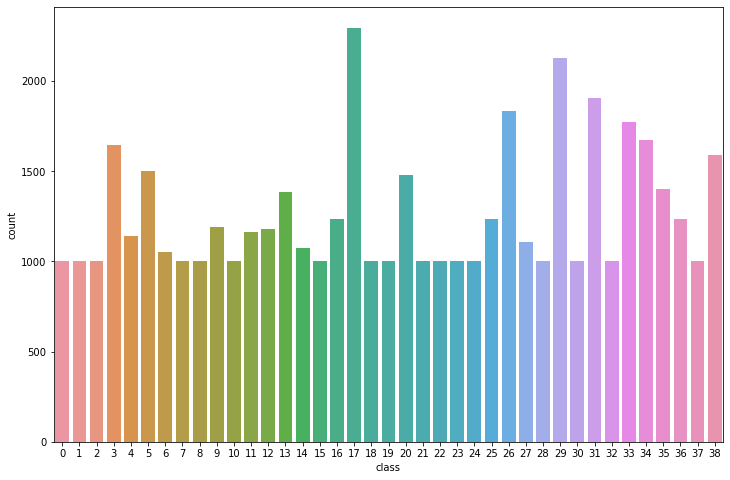

In [26]:
plt.figure(figsize=(12, 8))
sns.barplot(x = 'class', y='count', data = classCount)

<b>Note:</b> Classes are more balanced now.

In [27]:
# Total data samples after reducation
len(plantVillDatasetBalanced)

49237

# 3) Train Val Test Split

In [28]:
train_set, test_set = torch.utils.data.random_split(plantVillDatasetBalanced, [39237, 10000])
train_set, val_set = torch.utils.data.random_split(train_set, [30000, 9237])

In [29]:
batch_size = 50

train_loader = DataLoader(train_set, batch_size, shuffle=True, num_workers=2, pin_memory=True)
# val_loader = DataLoader(val_set, len(val_set), shuffle=True)
# test_loader = DataLoader(test_set, len(test_set), shuffle=True)
val_loader = DataLoader(val_set, batch_size, shuffle=True, num_workers=2, pin_memory=True)
test_loader = DataLoader(test_set, batch_size, shuffle=True, num_workers=2, pin_memory=True)

# 4) Create Model 

### Model 1: Base CNN Model

In [30]:
class basePlantClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.conv1 = nn.Conv2d(3, 128, 3, 1)
        self.maxpool = nn.MaxPool2d(2, 2)
        
        self.linear1 = nn.Linear(128*49*49, 39)
        self.dropoutLayer = nn.Dropout(p=0.4)
        self.relu    = nn.ReLU()
    
    def forward(self, image):
        out = self.conv1(image) 
        out = self.relu(out)
        out = self.maxpool(out)
        
        out = out.reshape(-1, 128*49*49)
        out = self.dropoutLayer(out)
        out = self.linear1(out)
        return out

### Model 2: Deeper CNN Model

In [31]:
class deeperPlantClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.conv1 = nn.Conv2d(3, 128, 3, 1, 0)
        self.batchNorm1 = nn.BatchNorm2d(num_features=128)
        self.maxpool = nn.MaxPool2d(2, 2)
        
        self.conv2 = nn.Conv2d(128, 256, 3, 1, 0)
        self.batchNorm2 = nn.BatchNorm2d(num_features=256)
        
        self.linear1 = nn.Linear(256*23*23, 100)
        self.linear2 = nn.Linear(100, 75)
        self.linear3 = nn.Linear(75, 39)
        self.relu    = nn.ReLU()
        self.dropoutLayer = nn.Dropout(p=0.2)
    
    def forward(self, image):
        out = self.conv1(image) 
        out = self.relu(out)
        out = self.batchNorm1(out)
        out = self.maxpool(out)
        
        out = self.conv2(out) 
        out = self.relu(out)
        out = self.batchNorm2(out)
        out = self.maxpool(out)
        
        out = out.reshape(-1, 256*23*23)
        out = self.linear1(out)
        out = self.relu(out)
        out = self.dropoutLayer(out)
        
        out = self.linear2(out)
        out = self.relu(out)
        out = self.dropoutLayer(out)
        
        out = self.linear3(out)
        return out

### Model 3: More Deeper CNN Model

In [32]:
class moreDeeperPlantClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.conv1 = nn.Conv2d(3, 64, 3, 1, 0)
        self.batchNorm1 = nn.BatchNorm2d(num_features=64)
        self.maxpool = nn.MaxPool2d(2, 2)
        
        self.conv2 = nn.Conv2d(64, 128, 3, 1, 0)
        self.batchNorm2 = nn.BatchNorm2d(num_features=128)
        
        self.conv3 = nn.Conv2d(128, 256, 3, 1, 0)
        self.batchNorm3 = nn.BatchNorm2d(num_features=256)
        
        
        self.linear1 = nn.Linear(256*10*10, 200)
        self.linear2 = nn.Linear(200, 100)
        self.linear3 = nn.Linear(100, 75)
        self.linear4 = nn.Linear(75, 39)
        self.relu    = nn.ReLU()
        self.dropoutLayer = nn.Dropout(p=0.4)
    
    def forward(self, image):
        out = self.conv1(image) 
        out = self.relu(out)
        out = self.batchNorm1(out)
        out = self.maxpool(out)
        
        out = self.conv2(out) 
        out = self.relu(out)
        out = self.batchNorm2(out)
        out = self.maxpool(out)
        
        out = self.conv3(out) 
        out = self.relu(out)
        out = self.batchNorm3(out)
        out = self.maxpool(out)
        
        out = out.reshape(-1, 256*10*10)
        out = self.dropoutLayer(out)
        
        out = self.linear1(out)
        out = self.relu(out)
        out = self.dropoutLayer(out)
        
        out = self.linear2(out)
        out = self.relu(out)
        out = self.dropoutLayer(out)
        
        out = self.linear3(out)
        out = self.relu(out)
        out = self.dropoutLayer(out)
        
        out = self.linear4(out)
        return out

# 5) Train Model

## Train Model 1

In [33]:
model1 = basePlantClassifier().to(device)

In [34]:
print(model1)

basePlantClassifier(
  (conv1): Conv2d(3, 128, kernel_size=(3, 3), stride=(1, 1))
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (linear1): Linear(in_features=307328, out_features=39, bias=True)
  (dropoutLayer): Dropout(p=0.4, inplace=False)
  (relu): ReLU()
)


### Model Parameter

In [35]:
def count_parameters(model):
    params = [p.numel() for p in model.parameters() if p.requires_grad]
    for item in params:
        print(f'{item:>6}')
    print(f'______\n{sum(params):>6}')

In [36]:
count_parameters(model1)

  3456
   128
11985792
    39
______
11989415


### Test Model

In [37]:
random_image = torch.rand((50, 3, 100, 100)).to(device)
out = model1(random_image)
print(out.shape)

torch.Size([50, 39])


### Loss Function and Optimizer

In [38]:
J_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model1.parameters(), lr=0.001)

### Train model

In [39]:
class EarlyStopping():
    def __init__(self, patience, threshold):
        self.patience      = 5
        self.threshold     = 0.1
        self.prev_val_loss = None
        self.patienceCount = 0
        
    def _checkPatience(self,):
        if self.patienceCount == self.patience:
            return True
        else:
            self.patienceCount += 1
            return False
    
    def checkCondition(self, val_loss):
        if self.prev_val_loss == None:
            self.prev_val_loss = val_loss
        elif val_loss - self.prev_val_loss > self.threshold:
            return self._checkPatience()
        
        self.patienceCount = 0
        return False

In [40]:
def train(model, optimizer, J_fn, filepath, epochs=10, patience = 5, threshold = 0.1):
    
    earlyStopping = EarlyStopping(patience, threshold)
    
    val_old_loss = float("Inf")
    train_losses = []
    train_accs   = []
    avg_train_losses_per_epoch = []
    avg_train_accs_per_epoch   = []
    val_losses   = []
    val_accs     = []
    training_time = []
    training_time_per_epoch = []
    
    for e in range(epochs):
        total_corr       = 0
        total_loss       = 0
        total_train_loss = 0
        total_time_epoch = 0
        for b, (image, label) in enumerate(train_loader):
            start_time = time.time()

            image = image.to(device)
            label = label.to(device)

            yhat = model(image)
            train_loss = J_fn(yhat, label)
            total_train_loss += train_loss

            train_losses.append(train_loss)
            predicted = torch.max(yhat, 1)[1]
            batch_corr = (predicted == label).sum()
            total_corr += batch_corr

            optimizer.zero_grad()
            train_loss.backward()
            optimizer.step()

            train_acc = (total_corr * 100) / (batch_size * (b + 1))
            train_accs.append(train_acc)

            total_time = time.time() - start_time
            total_time_epoch += total_time
            training_time.append(total_time)

            if (b+1) % 50 == 0:
                print(f"Epoch: {e + 1} - Batch: {b + 1} - Train Loss: {train_loss:.2f} - Train Acc: {train_acc:.2f} - Total Time: {total_time:.2f}s")
                # print("Loss Gradient for first Conv Layer: ", torch.mean(model.conv1.weight.grad) )
        
        avg_train_time = total_time_epoch / len(train_loader)
        training_time_per_epoch.append(avg_train_time)
        
        avg_train_loss = total_train_loss / len(train_loader)   
        avg_train_acc  = (total_corr * 100) / len(train_set)
        
        avg_train_losses_per_epoch.append(avg_train_loss)
        avg_train_accs_per_epoch.append(avg_train_acc)
        
        print(f"++++++End of Epoch {e + 1} ++++++ Avg Train Loss: {avg_train_loss:.2f} - Avg Train Acc: {avg_train_acc:.2f} - Avg Train Time: {avg_train_time:.2f}")

        with torch.no_grad():
            val_corr       = 0 
            total_val_loss = 0
            for val_image, val_label in val_loader:
                val_image = val_image.to(device)
                val_label = val_label.to(device)
                val_yhat = model(val_image)
                val_loss = J_fn(val_yhat, val_label)
                total_val_loss += val_loss
                val_predicted = torch.max(val_yhat, 1)[1]
                val_corr += (val_predicted == val_label).sum()
            val_acc = (val_corr * 100) / len(val_set)
            avg_val_loss = total_val_loss / len(val_loader)
            val_accs.append(val_acc)
            val_losses.append(val_loss)
            
            if avg_val_loss < val_old_loss:
                val_old_loss = avg_val_loss
                saveObject = {
                    'epoch': e + 1,
                    'batch': b + 1,
                    'train_loss': avg_train_loss,
                    'train_acc': avg_train_acc,
                    'val_loss': avg_val_loss,
                    'val_acc': val_acc,
                    'model_state_dict': model.state_dict(),
                    'optimizer_state_dict': optimizer.state_dict(),
                }
                torch.save(saveObject, filepath)
            
        if earlyStopping.checkCondition(avg_val_loss):
            break
            
        print(f"++++++Validation++++++ Val Loss: {avg_val_loss:.2f} - Val Acc: {val_acc:.2f}")
        
    train_losses               = torch.Tensor(train_losses).cpu()
    avg_train_losses_per_epoch = torch.Tensor(avg_train_losses_per_epoch).cpu()
    train_accs                 = torch.Tensor(train_accs).cpu()
    avg_train_accs_per_epoch   = torch.Tensor(avg_train_accs_per_epoch).cpu()
    val_losses                 = torch.Tensor(val_losses).cpu() 
    val_accs                   = torch.Tensor(val_accs).cpu()
    
        
    return train_losses, avg_train_losses_per_epoch, train_accs, avg_train_accs_per_epoch, training_time, training_time_per_epoch, val_losses, val_accs

In [41]:
filepath = './ModelParameter/Model 1/bestBaseModel.pt'

In [42]:
train_losses, avg_train_losses_per_epoch, train_accs, avg_train_accs_per_epoch, training_time, training_time_per_epoch, val_losses, val_accs = train(model1, optimizer, J_fn, filepath, 35)

Epoch: 1 - Batch: 50 - Train Loss: 3.13 - Train Acc: 22.28 - Total Time: 0.04s
Epoch: 1 - Batch: 100 - Train Loss: 1.92 - Train Acc: 36.46 - Total Time: 0.04s
Epoch: 1 - Batch: 150 - Train Loss: 1.38 - Train Acc: 44.36 - Total Time: 0.04s
Epoch: 1 - Batch: 200 - Train Loss: 0.75 - Train Acc: 49.73 - Total Time: 0.04s
Epoch: 1 - Batch: 250 - Train Loss: 1.49 - Train Acc: 52.84 - Total Time: 0.04s
Epoch: 1 - Batch: 300 - Train Loss: 1.33 - Train Acc: 55.58 - Total Time: 0.04s
Epoch: 1 - Batch: 350 - Train Loss: 1.09 - Train Acc: 58.21 - Total Time: 0.04s
Epoch: 1 - Batch: 400 - Train Loss: 1.30 - Train Acc: 60.09 - Total Time: 0.00s
Epoch: 1 - Batch: 450 - Train Loss: 0.82 - Train Acc: 61.93 - Total Time: 0.04s
Epoch: 1 - Batch: 500 - Train Loss: 0.69 - Train Acc: 63.66 - Total Time: 0.04s
Epoch: 1 - Batch: 550 - Train Loss: 0.94 - Train Acc: 65.07 - Total Time: 0.04s
Epoch: 1 - Batch: 600 - Train Loss: 0.83 - Train Acc: 66.33 - Total Time: 0.00s
++++++End of Epoch 1 ++++++ Avg Train Los

### Load training history from saved file

In [111]:
# https://stackoverflow.com/questions/55388781/can-anyone-tell-me-how-to-checking-if-pytorch-model-exists-and-if-it-does-dele

In [44]:
# loadObject = torch.load('./ModelParameter/Model 1/baseModeltrainingHist.pt')

In [77]:
# if os.path.exists('./ModelParameter/Model 1/baseModeltrainingHist.pt')
    # train_losses = loadObject['train_losses']
    # avg_train_losses_per_epoch = loadObject['avg_train_losses_per_epoch']
    # train_accs = loadObject['train_accs']
    # avg_train_accs_per_epoch = loadObject['avg_train_accs_per_epoch']
    # training_time = loadObject['training_time']
    # training_time_per_epoch = loadObject['training_time_per_epoch']
    # val_losses = loadObject['val_losses']
    # val_accs = loadObject['val_accs']
# else:
#     print("Currently, training history is not saved.")

### Plotting Loss

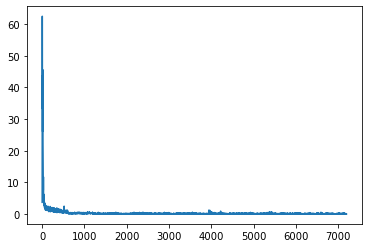

In [47]:
plt.plot(train_losses)

In [48]:
def plotLoss(trainingLoss, valLoss):
    plt.plot(trainingLoss)
    plt.plot(valLoss)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(["Training Loss", "Val Loss"])

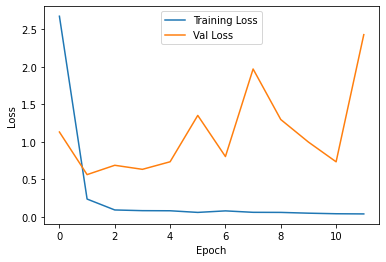

In [50]:
plotLoss(avg_train_losses_per_epoch, val_losses)

### Plotting Acccuracy

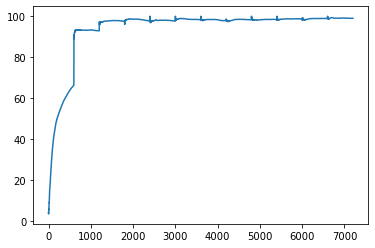

In [51]:
plt.plot(train_accs)

In [52]:
def plotAccuracy(trainingAcc, valAcc):
    plt.plot(trainingAcc)
    plt.plot(valAcc)
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy (%)")
    plt.legend(["Training Accuracy", "Val Accuracy"])

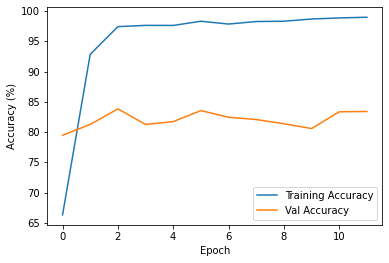

In [53]:
plotAccuracy(avg_train_accs_per_epoch, val_accs)

### Plotting Training Time

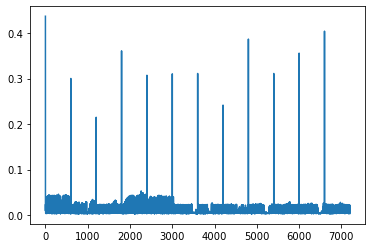

In [54]:
plt.plot(training_time)

In [55]:
def plotTrainingTime(training_time):
    plt.plot(training_time)
    plt.xlabel("Epoch")
    plt.ylabel("Training Time (s)")

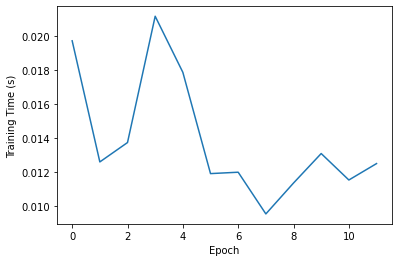

In [56]:
plotTrainingTime(training_time_per_epoch)

In [57]:
saveObject = {
    'train_losses': train_losses,
    'avg_train_losses_per_epoch': avg_train_losses_per_epoch,
    'train_accs': train_accs,
    'avg_train_accs_per_epoch': avg_train_accs_per_epoch,
    'training_time': training_time,
    'training_time_per_epoch': training_time_per_epoch,
    'val_losses': val_losses,
    'val_accs': val_accs
}

torch.save(saveObject, './ModelParameter/Model 1/baseModeltrainingHist.pt')

## Train Model 2

In [58]:
model2 = deeperPlantClassifier().to(device)

In [59]:
print(model2)

deeperPlantClassifier(
  (conv1): Conv2d(3, 128, kernel_size=(3, 3), stride=(1, 1))
  (batchNorm1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
  (batchNorm2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (linear1): Linear(in_features=135424, out_features=100, bias=True)
  (linear2): Linear(in_features=100, out_features=75, bias=True)
  (linear3): Linear(in_features=75, out_features=39, bias=True)
  (relu): ReLU()
  (dropoutLayer): Dropout(p=0.2, inplace=False)
)


### Model Parameter

In [60]:
count_parameters(model2)

  3456
   128
   128
   128
294912
   256
   256
   256
13542400
   100
  7500
    75
  2925
    39
______
13852559


### Test Model

In [61]:
random_image = torch.rand((50, 3, 100, 100)).to(device)
out = model2(random_image)
print(out.shape)

torch.Size([50, 39])


### Loss Function and Optimizer

In [62]:
J_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model2.parameters(), lr=0.001)

### Train Model

In [63]:
filepath2 = './ModelParameter/Model 2/bestModel2Para.pt'

In [64]:
train_losses2, avg_train_losses_per_epoch2, train_accs2, avg_train_accs_per_epoch2, training_time2, training_time_per_epoch2, val_losses2, val_accs2 = train(model2, optimizer, J_fn, filepath2, 35)

Epoch: 1 - Batch: 50 - Train Loss: 3.21 - Train Acc: 9.60 - Total Time: 0.06s
Epoch: 1 - Batch: 100 - Train Loss: 3.37 - Train Acc: 12.70 - Total Time: 0.06s
Epoch: 1 - Batch: 150 - Train Loss: 3.04 - Train Acc: 14.71 - Total Time: 0.06s
Epoch: 1 - Batch: 200 - Train Loss: 2.69 - Train Acc: 17.05 - Total Time: 0.06s
Epoch: 1 - Batch: 250 - Train Loss: 2.92 - Train Acc: 18.87 - Total Time: 0.06s
Epoch: 1 - Batch: 300 - Train Loss: 2.44 - Train Acc: 20.60 - Total Time: 0.01s
Epoch: 1 - Batch: 350 - Train Loss: 2.28 - Train Acc: 21.89 - Total Time: 0.01s
Epoch: 1 - Batch: 400 - Train Loss: 2.72 - Train Acc: 23.04 - Total Time: 0.06s
Epoch: 1 - Batch: 450 - Train Loss: 3.24 - Train Acc: 24.00 - Total Time: 0.06s
Epoch: 1 - Batch: 500 - Train Loss: 2.47 - Train Acc: 25.12 - Total Time: 0.06s
Epoch: 1 - Batch: 550 - Train Loss: 2.35 - Train Acc: 26.15 - Total Time: 0.06s
Epoch: 1 - Batch: 600 - Train Loss: 2.19 - Train Acc: 27.22 - Total Time: 0.06s
++++++End of Epoch 1 ++++++ Avg Train Loss

### Load training history from saved file

In [75]:
# loadObject = torch.load('./ModelParameter/Model 2/Model2TrainingHist.pt')

In [76]:
# if os.path.exists('./ModelParameter/Model 2/Model2TrainingHist.pt')
    # train_losses2 = loadObject['train_losses']
    # avg_train_losses_per_epoch2 = loadObject['avg_train_losses_per_epoch']
    # train_accs2 = loadObject['train_accs']
    # avg_train_accs_per_epoch2 = loadObject['avg_train_accs_per_epoch']
    # training_time2 = loadObject['training_time']
    # training_time_per_epoch2 = loadObject['training_time_per_epoch']
    # val_losses2 = loadObject['val_losses']
    # val_accs2 = loadObject['val_accs']
# else:
#     print("Currently, training history is not saved.")

### Plotting Loss

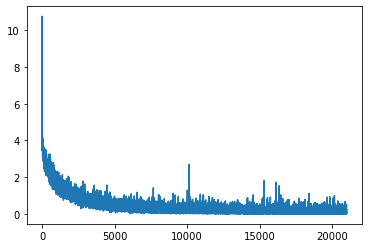

In [65]:
plt.plot(train_losses2)

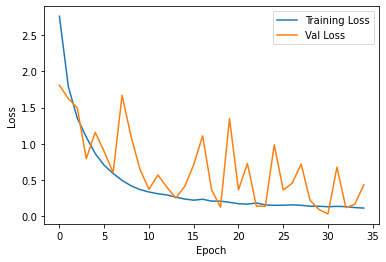

In [66]:
plotLoss(avg_train_losses_per_epoch2, val_losses2)

### Plotting Acccuracy

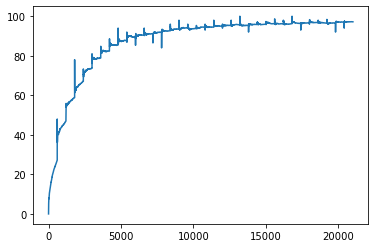

In [67]:
plt.plot(train_accs2)

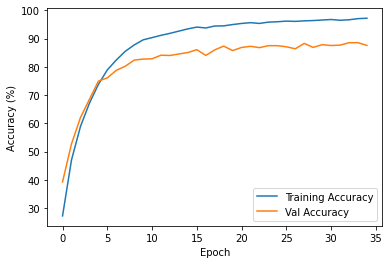

In [68]:
plotAccuracy(avg_train_accs_per_epoch2, val_accs2)

### Plotting Training Time

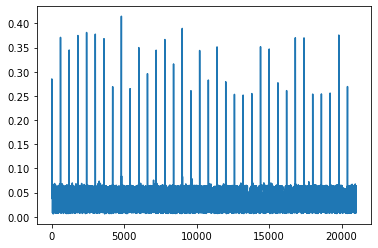

In [69]:
plt.plot(training_time2)

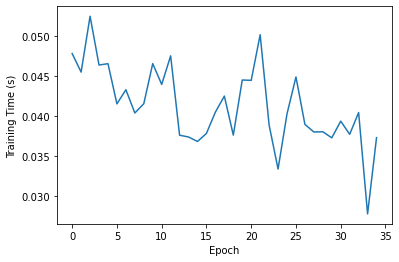

In [70]:
plotTrainingTime(training_time_per_epoch2)

In [72]:
saveObject = {
    'train_losses': train_losses2,
    'avg_train_losses_per_epoch': avg_train_losses_per_epoch2,
    'train_accs': train_accs2,
    'avg_train_accs_per_epoch': avg_train_accs_per_epoch2,
    'training_time': training_time2,
    'training_time_per_epoch': training_time_per_epoch2,
    'val_losses': val_losses2,
    'val_accs': val_accs2
}

torch.save(saveObject, './ModelParameter/Model 2/Model2TrainingHist.pt')

## Train Model 3

In [78]:
model3 = moreDeeperPlantClassifier().to(device)

In [79]:
print(model3)

moreDeeperPlantClassifier(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1))
  (batchNorm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (batchNorm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
  (batchNorm3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (linear1): Linear(in_features=25600, out_features=200, bias=True)
  (linear2): Linear(in_features=200, out_features=100, bias=True)
  (linear3): Linear(in_features=100, out_features=75, bias=True)
  (linear4): Linear(in_features=75, out_features=39, bias=True)
  (relu): ReLU()
  (dropoutLayer): Dropout(p=0.4, inplace=False)
)


#### Model Parameter

In [80]:
count_parameters(model3)

  1728
    64
    64
    64
 73728
   128
   128
   128
294912
   256
   256
   256
5120000
   200
 20000
   100
  7500
    75
  2925
    39
______
5522551


#### Test Model

In [81]:
random_image = torch.rand((50, 3, 100, 100)).to(device)
out = model3(random_image)
print(out.shape)

torch.Size([50, 39])


### Loss Function and Optimizer

In [82]:
J_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model3.parameters(), lr=0.001)

### Train Model

In [83]:
filepath3 = './ModelParameter/Model 3/bestModel3Para.pt'

In [84]:
train_losses3, avg_train_losses_per_epoch3, train_accs3, avg_train_accs_per_epoch3, training_time3, training_time_per_epoch3, val_losses3, val_accs3 = train(model3, optimizer, J_fn, filepath3, 35)

Epoch: 1 - Batch: 50 - Train Loss: 3.34 - Train Acc: 5.84 - Total Time: 0.01s
Epoch: 1 - Batch: 100 - Train Loss: 2.92 - Train Acc: 10.48 - Total Time: 0.02s
Epoch: 1 - Batch: 150 - Train Loss: 2.72 - Train Acc: 14.05 - Total Time: 0.02s
Epoch: 1 - Batch: 200 - Train Loss: 2.49 - Train Acc: 16.94 - Total Time: 0.02s
Epoch: 1 - Batch: 250 - Train Loss: 2.18 - Train Acc: 19.73 - Total Time: 0.01s
Epoch: 1 - Batch: 300 - Train Loss: 2.16 - Train Acc: 21.70 - Total Time: 0.02s
Epoch: 1 - Batch: 350 - Train Loss: 2.00 - Train Acc: 23.77 - Total Time: 0.02s
Epoch: 1 - Batch: 400 - Train Loss: 1.97 - Train Acc: 25.72 - Total Time: 0.06s
Epoch: 1 - Batch: 450 - Train Loss: 2.35 - Train Acc: 27.36 - Total Time: 0.05s
Epoch: 1 - Batch: 500 - Train Loss: 2.00 - Train Acc: 29.06 - Total Time: 0.01s
Epoch: 1 - Batch: 550 - Train Loss: 2.27 - Train Acc: 30.36 - Total Time: 0.05s
Epoch: 1 - Batch: 600 - Train Loss: 1.92 - Train Acc: 31.60 - Total Time: 0.09s
++++++End of Epoch 1 ++++++ Avg Train Loss

### Load training history from saved file

In [95]:
# loadObject = torch.load('./ModelParameter/Model 3/Model3TrainingHist.pt')

In [97]:
# if os.path.exists('./ModelParameter/Model 2/Model2TrainingHist.pt')
    # train_losses3 = loadObject['train_losses']
    # avg_train_losses_per_epoch3 = loadObject['avg_train_losses_per_epoch']
    # train_accs3 = loadObject['train_accs']
    # avg_train_accs_per_epoch3 = loadObject['avg_train_accs_per_epoch']
    # training_time3 = loadObject['training_time']
    # training_time_per_epoch3 = loadObject['training_time_per_epoch']
    # val_losses3 = loadObject['val_losses']
    # val_accs3 = loadObject['val_accs']
# else:
#     print("Currently, training history is not saved.")

### Plotting Loss

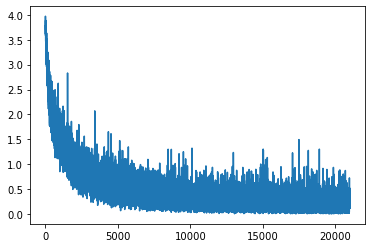

In [85]:
plt.plot(train_losses3)

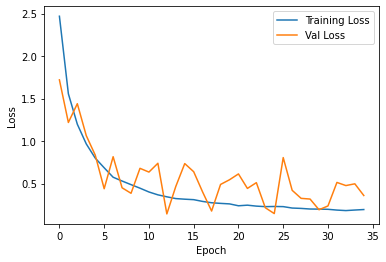

In [86]:
plotLoss(avg_train_losses_per_epoch3, val_losses3)

### Plotting Acccuracy

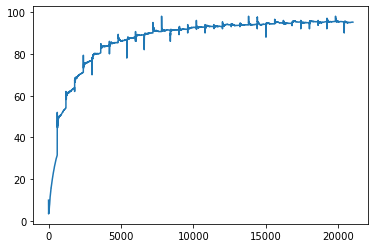

In [87]:
plt.plot(train_accs3)

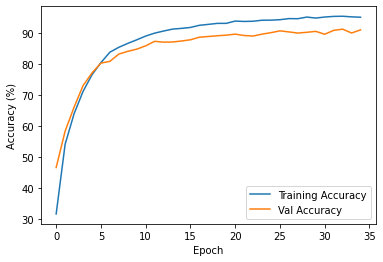

In [88]:
plotAccuracy(avg_train_accs_per_epoch3, val_accs3)

### Plotting Training Time

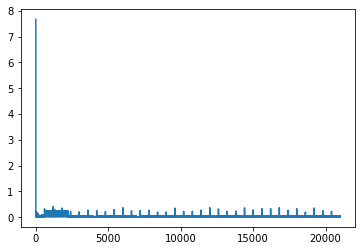

In [89]:
plt.plot(training_time3)

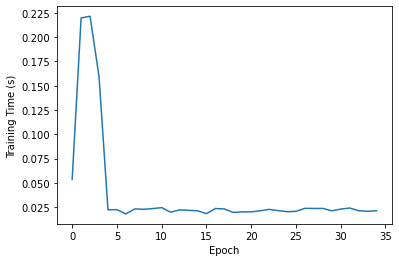

In [90]:
plotTrainingTime(training_time_per_epoch3)

In [92]:
saveObject = {
    'train_losses': train_losses3,
    'avg_train_losses_per_epoch': avg_train_losses_per_epoch3,
    'train_accs': train_accs3,
    'avg_train_accs_per_epoch': avg_train_accs_per_epoch3,
    'training_time': training_time3,
    'training_time_per_epoch': training_time_per_epoch3,
    'val_losses': val_losses3,
    'val_accs': val_accs3
}

torch.save(saveObject, './ModelParameter/Model 3/Model3TrainingHist.pt')

### Comparision of Training Progession of Three Models

#### Training Loss Plot

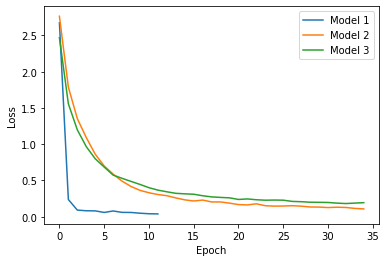

In [98]:
plt.plot(torch.Tensor(avg_train_losses_per_epoch).cpu())
plt.plot(torch.Tensor(avg_train_losses_per_epoch2).cpu())
plt.plot(torch.Tensor(avg_train_losses_per_epoch3).cpu())
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Model 1", "Model 2", "Model 3"])

#### Validation Loss Plot

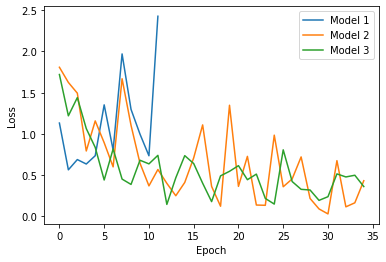

In [99]:
plt.plot(torch.Tensor(val_losses).cpu())
plt.plot(torch.Tensor(val_losses2).cpu())
plt.plot(torch.Tensor(val_losses3).cpu())
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Model 1", "Model 2", "Model 3"])

#### Accuracy Loss Plot (on training data)

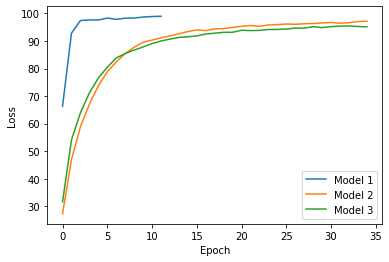

In [100]:
plt.plot(torch.Tensor(avg_train_accs_per_epoch).cpu())
plt.plot(torch.Tensor(avg_train_accs_per_epoch2).cpu())
plt.plot(torch.Tensor(avg_train_accs_per_epoch3).cpu())
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Model 1", "Model 2", "Model 3"])

#### Accuracy Loss Plot (on validation data)

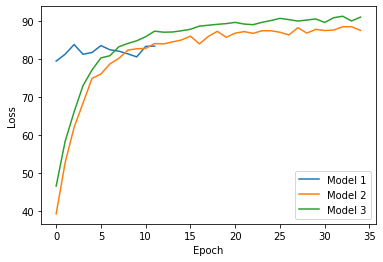

In [101]:
plt.plot(torch.Tensor(val_accs).cpu())
plt.plot(torch.Tensor(val_accs2).cpu())
plt.plot(torch.Tensor(val_accs3).cpu())
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Model 1", "Model 2", "Model 3"])

# 6) Test

In [102]:
checkpoint1 = torch.load(filepath)
checkpoint2 = torch.load(filepath2)
checkpoint3 = torch.load(filepath3)

In [103]:
bestModel1 = basePlantClassifier().to(device)
bestModel2 = deeperPlantClassifier().to(device)
bestModel3 = moreDeeperPlantClassifier().to(device)

In [105]:
bestModel1.eval()
bestModel2.eval()
bestModel3.eval()

moreDeeperPlantClassifier(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1))
  (batchNorm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (batchNorm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
  (batchNorm3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (linear1): Linear(in_features=25600, out_features=200, bias=True)
  (linear2): Linear(in_features=200, out_features=100, bias=True)
  (linear3): Linear(in_features=100, out_features=75, bias=True)
  (linear4): Linear(in_features=75, out_features=39, bias=True)
  (relu): ReLU()
  (dropoutLayer): Dropout(p=0.4, inplace=False)
)

In [106]:
def testModel(model):
    with torch.no_grad():
        correct = 0
        acc     = 0
        total   = 0
        allPrediction       = []
        correctLabels       = []
        misclassifiedLabels = []
        
        for images, targets in test_loader:
            images  = images.to(device)
            targets = targets.to(device)                  

            yhat    = model(images)
            predicted = torch.max(yhat, 1)[1] 
            batch_corr = (predicted == targets).sum()
            correct   += batch_corr
            total     += targets.shape[0]
            
            for i in range(len(predicted)):
                if predicted[i] != targets[i]:
                    misclassifiedLabels.append({
                        'correctLabel': targets[i],
                        'predicted': predicted[i],
                        'image': images[i]
                    })

            allPrediction.append(predicted)
            correctLabels.append(targets)

        acc = 100 * correct / total
        print(f"Accuracy: {acc:.2f}")
        
        return allPrediction, correctLabels, misclassifiedLabels

### Accuracy of Model 1

In [107]:
allPrediction1, correctLabels1, misclassifiedLabels1 = testModel(bestModel1)

Accuracy: 84.14


### Accuracy of Model 2

In [108]:
allPrediction2, correctLabels2, misclassifiedLabels2 = testModel(bestModel2)

Accuracy: 92.24


### Accuracy of Model 3

In [109]:
allPrediction3, correctLabels3, misclassifiedLabels3 = testModel(bestModel3)

Accuracy: 96.66


## 6.1) Display Confusion Matrix

In [110]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#### Model 1

In [112]:
allPredictionTensor1 = allPrediction1[0]
correctLabelsTensor1 = correctLabels1[0]

In [113]:
for i in range(1, len(allPrediction1)):
    allPredictionTensor1 = torch.cat((allPredictionTensor1, allPrediction1[i]))
    
for i in range(1, len(correctLabels1)):
    correctLabelsTensor1 = torch.cat((correctLabelsTensor1, correctLabels1[i]))

In [114]:
# disp = ConfusionMatrixDisplay(confusion_matrix(correctLabelsTensor1.cpu(), allPredictionTensor1.cpu()))
# fig, ax = plt.subplots(figsize=(15,15))
# disp.plot(ax=ax, cmap='BuGn')

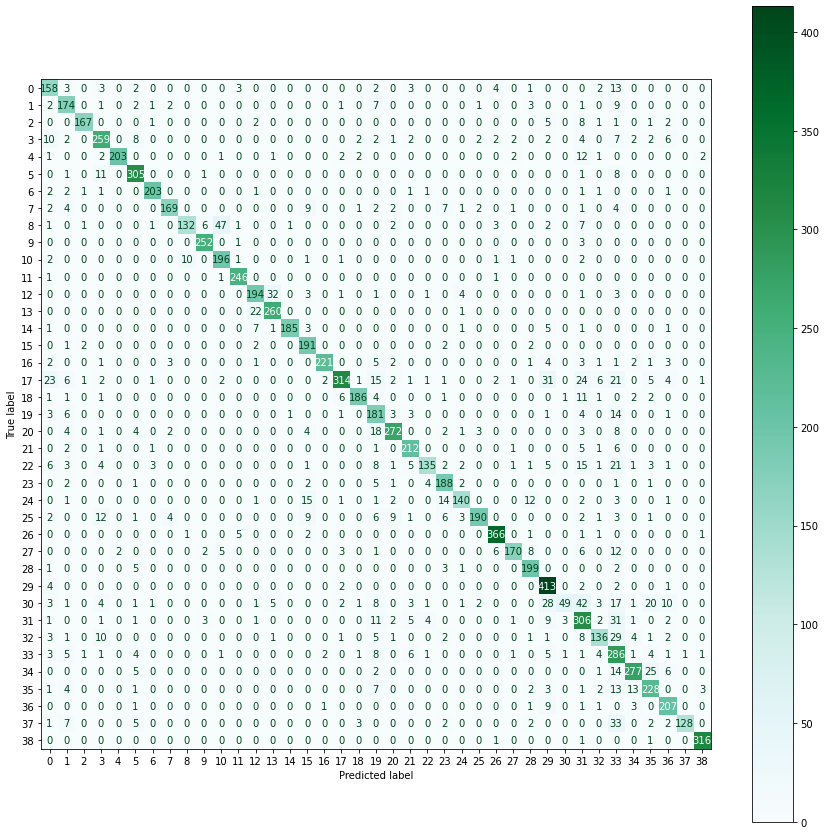

In [115]:
confusion_matrix_report1 = confusion_matrix(correctLabelsTensor1.cpu(), allPredictionTensor1.cpu())
disp = ConfusionMatrixDisplay(confusion_matrix_report1)
fig, ax = plt.subplots(figsize=(15,15))
disp.plot(ax=ax, cmap='BuGn')

#### Model 2

In [116]:
allPredictionTensor2 = allPrediction2[0]
correctLabelsTensor2 = correctLabels2[0]

In [117]:
for i in range(1, len(allPrediction2)):
    allPredictionTensor2 = torch.cat((allPredictionTensor2, allPrediction2[i]))
    
for i in range(1, len(correctLabels2)):
    correctLabelsTensor2 = torch.cat((correctLabelsTensor2, correctLabels2[i]))

In [118]:
# disp = ConfusionMatrixDisplay(confusion_matrix(allPredictionTensor2.cpu(), correctLabelsTensor2.cpu()))
# fig, ax = plt.subplots(figsize=(15,15))
# disp.plot(ax=ax, cmap='BuGn')

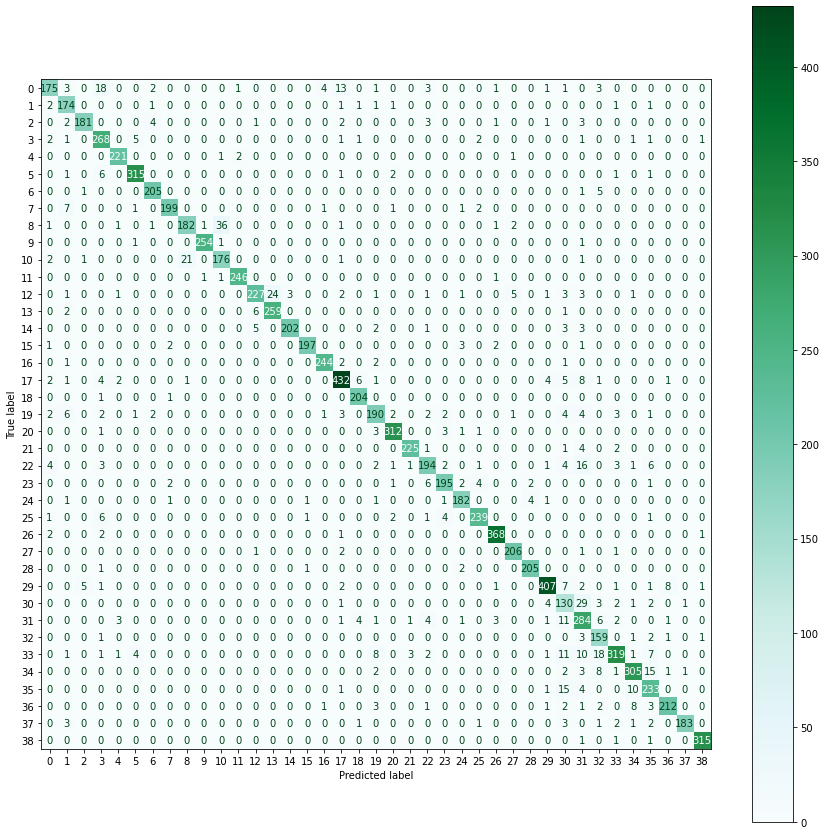

In [119]:
confusion_matrix_report2 = confusion_matrix(allPredictionTensor2.cpu(), correctLabelsTensor2.cpu())
disp = ConfusionMatrixDisplay(confusion_matrix_report2)
fig, ax = plt.subplots(figsize=(15,15))
disp.plot(ax=ax, cmap='BuGn')

#### Model 3

In [120]:
allPredictionTensor3 = allPrediction3[0]
correctLabelsTensor3 = correctLabels3[0]

In [121]:
for i in range(1, len(allPrediction3)):
    allPredictionTensor3 = torch.cat((allPredictionTensor3, allPrediction3[i]))
    
for i in range(1, len(correctLabels3)):
    correctLabelsTensor3 = torch.cat((correctLabelsTensor3, correctLabels3[i]))

In [122]:
# disp = ConfusionMatrixDisplay(confusion_matrix(allPredictionTensor3.cpu(), correctLabelsTensor3.cpu()))
# fig, ax = plt.subplots(figsize=(15,15))
# disp.plot(ax=ax, cmap='BuGn')

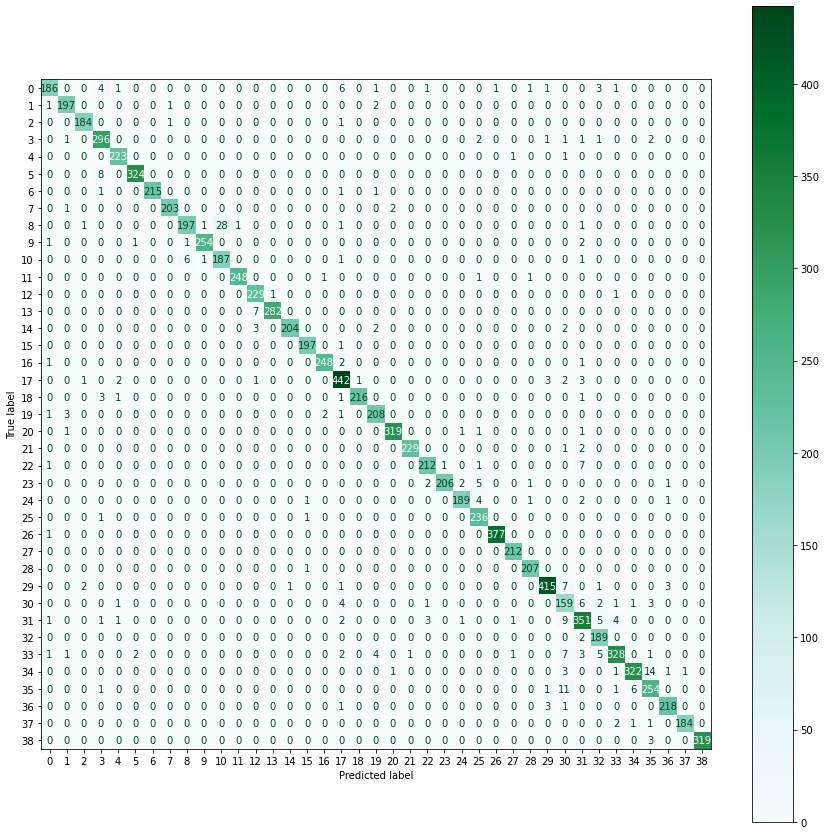

In [123]:
confusion_matrix_report3 = confusion_matrix(allPredictionTensor3.cpu(), correctLabelsTensor3.cpu())
disp = ConfusionMatrixDisplay(confusion_matrix_report3)
fig, ax = plt.subplots(figsize=(15,15))
disp.plot(ax=ax, cmap='BuGn')

## 6.2) Examining Misclassified Labels

## Prediction Accuracy Per Label

In [124]:
def count_misclassified_images_per_label(confusion_matrix_report):
    total_number_misclassified_labels = []
    misclassified_labels_percentage   = []
    for i in range(len(confusion_matrix_report)):
        total_label_misclassified = sum(confusion_matrix_report[i][:i]) + sum(confusion_matrix_report[i][i + 1:])
        total_number_misclassified_labels.append(total_label_misclassified)
        
        total_no_of_label            = sum(confusion_matrix_report[i])
        label_classfication_accuracy = 100 * confusion_matrix_report[i][i] / total_no_of_label
        misclassified_labels_percentage.append(label_classfication_accuracy)
    return total_number_misclassified_labels, misclassified_labels_percentage

In [125]:
def top_misclassified_predicted_labels(confusion_matrix_report, labels):
    top_three_misclassifications_per_label = {}
    for label in labels:
        sorted_indices       = np.argsort(confusion_matrix_report[label])
        top_three_mislabeled = np.argsort(confusion_matrix_report[label])[-4:-1]
        
        top_three_misclassifications_per_label[label] = top_three_mislabeled
    
    return top_three_misclassifications_per_label

In [126]:
def plot_misclassified_images_per_labels(misclassified_images_per_labels, label_prediction_accuracy, title1, title2, labels):
    plt.figure(figsize=(12,6))
    plt.bar(labels, misclassified_images_per_labels)
    plt.xlabel("Labels")
    plt.ylabel("No of Missclassifications")
    plt.title(title1)
    plt.show()
    
    plt.figure(figsize=(12,6))
    plt.bar(labels, label_prediction_accuracy)
    plt.xlabel("Labels")
    plt.ylabel("Prediction Accuracy")
    plt.title(title2)
    plt.show()

In [127]:
def show_misclassified_images_per_labels(label, top_3_mislabeled, misclassifiedLabels):
    if label not in top_3_mislabeled:
        print("Please choose one of top three misclassified labels")
        return
    
    count = 0
    images = torch.Tensor([])
    for Images, targets in test_loader:
        for i in range(len(targets)):
            if targets[i] == label and count < 12:
                image = torch.Tensor(Images[i]).cpu().reshape(1, 3, 100, 100)
                images = torch.cat((images, image))
                count += 1
        if count == 6:
            break
            
    grid = make_grid(images, nrow = 6)
    grid = grid / 2 + 0.5 # unnormalize image
    im_transpose = np.transpose(grid, (1, 2, 0))
    plt.figure(figsize=(11, 11))
    plt.title(f"Correct Label: {label} {classNames[label]}")
    plt.imshow(im_transpose)

    for incorrect_label in reversed(top_3_mislabeled[label]):
        images = torch.Tensor([])
        count = 0
        for misclassifiedLabel in misclassifiedLabels:
            if misclassifiedLabel['correctLabel'] == incorrect_label:
                image = torch.Tensor(misclassifiedLabel['image']).cpu().reshape(1, 3, 100, 100)
                images = torch.cat((images, image))
                count += 1

            if count == 6:
                break
        
        grid = make_grid(images, nrow = 6)
        grid = grid / 2 + 0.5 # unnormalize image
        im_transpose = np.transpose(grid, (1, 2, 0))
        plt.figure(figsize=(11, 11))
        plt.title(f"Misclassified Label: {incorrect_label} {classNames[incorrect_label]}")
        plt.imshow(im_transpose)

In [128]:
def list_top_3_mislabeled_count(low_accuracy_labels, top_3_mislabeled, confusion_matrix_report):
    for label in low_accuracy_labels:
        print(f"For label {label}, {classNames[label]}, top three misclassified labels are:")
        for mislabeled in reversed(top_3_mislabeled[label]):
            mislabeled_count = confusion_matrix_report[label][mislabeled]
            print(f"---> Mislabeled: {mislabeled} {classNames[mislabeled]}")
            print("Count:", mislabeled_count)
        print("")

In [129]:
def show_misclassified_images(misclassifiedLabels):
    misses         = torch.Tensor([])
    correctLabels   = torch.Tensor([])
    images = torch.Tensor([])
    
    for i in range(12):
        miss = torch.Tensor(misclassifiedLabels[i]['correctLabel']).cpu().reshape(1)
        misses = torch.cat((misses, miss)).to(torch.int)
        
        correctLabel = torch.Tensor(misclassifiedLabels[i]['predicted']).cpu().reshape(1)
        correctLabels = torch.cat((correctLabels, correctLabel)).to(torch.int)
        
        image = torch.Tensor(misclassifiedLabels[i]['image']).cpu().reshape(1, 3, 100, 100)
        images = torch.cat((images, image))
        
    print("Correct Labels:  ", correctLabels)
    print("Predicted Labels:", misses, end="\n\n")
    
    grid = make_grid(images, nrow = 6)
    grid = grid / 2 + 0.5 # unnormalize image
    im_transpose = np.transpose(grid, (1, 2, 0)) 
    plt.figure(figsize=(11, 11))
    plt.imshow(im_transpose)
    
    for i in range(len(correctLabels)):
        print(f"Correct Label: {correctLabels[i]} --> {classNames[correctLabels[i]]}")
        print(f"Predicted Label: {misses[i]} --> {classNames[misses[i]]}", end="\n\n")

#### Model 1

In [130]:
print("Total Misclassified Images:", len(misclassifiedLabels1))

Total Misclassified Images: 1586


In [131]:
misclassified_images_per_labels1, label_prediction_accuracy1 = count_misclassified_images_per_label(confusion_matrix_report1)

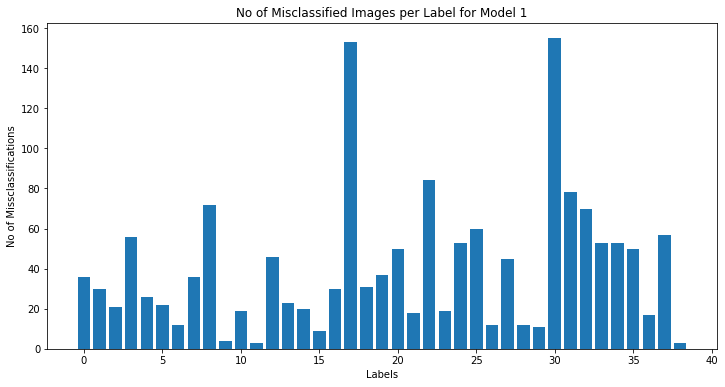

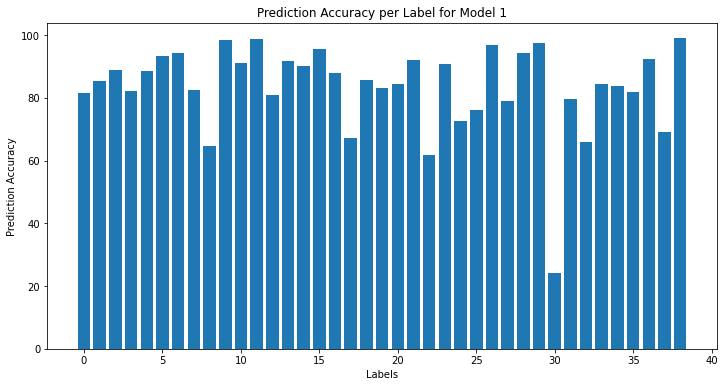

In [133]:
plot_misclassified_images_per_labels(misclassified_images_per_labels1, label_prediction_accuracy1, "No of Misclassified Images per Label for Model 1",
                                     "Prediction Accuracy per Label for Model 1", labels)

<b>Note:</b> Low accuracy prediction on labels 8, 17, 22, 30, and 37.

In [146]:
print(8, classNames[8])
print(17, classNames[17])
print(22, classNames[22])
print(30, classNames[30])
print(33, classNames[37])

8 Corn___Cercospora_leaf_spot Gray_leaf_spot
17 Peach___Bacterial_spot
22 Potato___Late_blight
30 Tomato___Early_blight
33 Tomato___Tomato_mosaic_virus


#### Model 2

In [138]:
print("Total Misclassified Images:", len(misclassifiedLabels2))

Total Misclassified Images: 776


In [139]:
misclassified_images_per_labels2, label_prediction_accuracy2 = count_misclassified_images_per_label(confusion_matrix_report2)

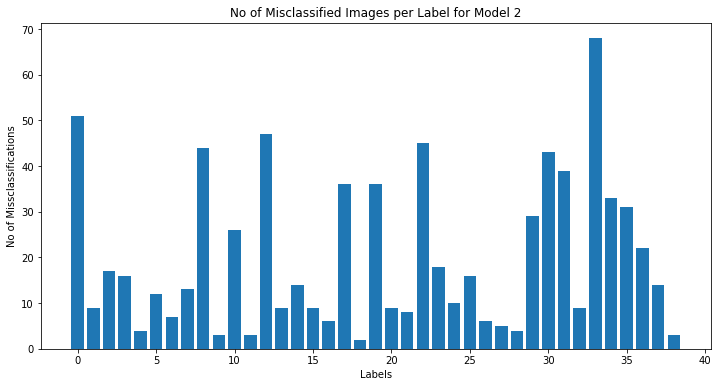

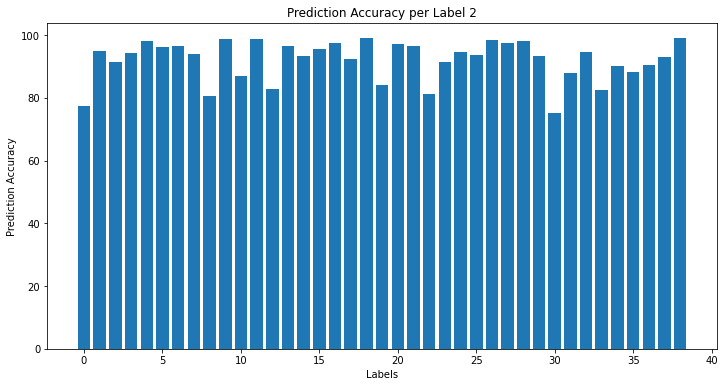

In [141]:
plot_misclassified_images_per_labels(misclassified_images_per_labels2, label_prediction_accuracy2, "No of Misclassified Images per Label for Model 2",
                                     "Prediction Accuracy per Label 2", labels)

<b>Note:</b> Prediction accuracy on labels 0 and 30 lower compared to other labels

In [156]:
print(0, classNames[0])
print(30, classNames[30])

0 Apple___Apple_scab
30 Tomato___Early_blight


#### Model 3

In [143]:
print("Total Misclassified Images:", len(misclassifiedLabels3))

Total Misclassified Images: 334


In [144]:
misclassified_images_per_labels3, label_prediction_accuracy3 = count_misclassified_images_per_label(confusion_matrix_report3)

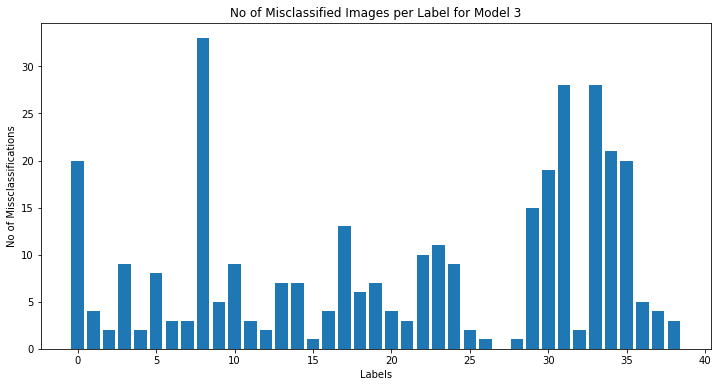

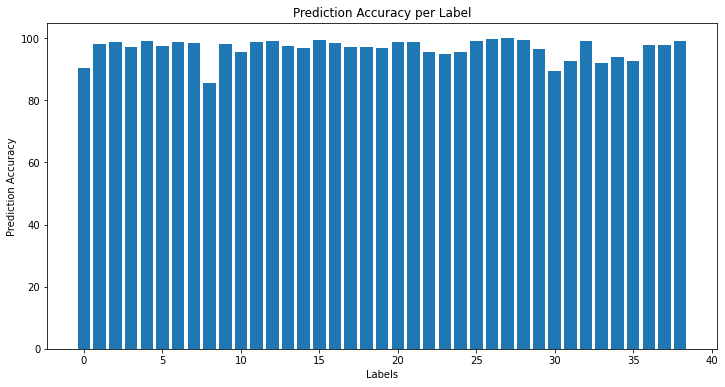

In [145]:
plot_misclassified_images_per_labels(misclassified_images_per_labels3, label_prediction_accuracy3, "No of Misclassified Images per Label for Model 3",
                                     "Prediction Accuracy per Label", labels)

<b>Note:</b> Prediction accuracy on label 8 is lower compared to other labels

## Examining Misclassified Images

#### Model 1

Correct Labels:   tensor([20,  1, 19, 23, 34, 33, 25, 19, 29,  3, 27, 33], dtype=torch.int32)
Predicted Labels: tensor([16, 33, 22, 32, 35, 34, 30,  1, 33, 32, 10, 32], dtype=torch.int32)

Correct Label: 20 --> Pepper,_bell___healthy
Predicted Label: 16 --> Orange___Haunglongbing_(Citrus_greening)

Correct Label: 1 --> Apple___Black_rot
Predicted Label: 33 --> Tomato___Septoria_leaf_spot

Correct Label: 19 --> Pepper,_bell___Bacterial_spot
Predicted Label: 22 --> Potato___Late_blight

Correct Label: 23 --> Potato___healthy
Predicted Label: 32 --> Tomato___Leaf_Mold

Correct Label: 34 --> Tomato___Spider_mites Two-spotted_spider_mite
Predicted Label: 35 --> Tomato___Target_Spot

Correct Label: 33 --> Tomato___Septoria_leaf_spot
Predicted Label: 34 --> Tomato___Spider_mites Two-spotted_spider_mite

Correct Label: 25 --> Soybean___healthy
Predicted Label: 30 --> Tomato___Early_blight

Correct Label: 19 --> Pepper,_bell___Bacterial_spot
Predicted Label: 1 --> Apple___Black_rot

Correct Lab

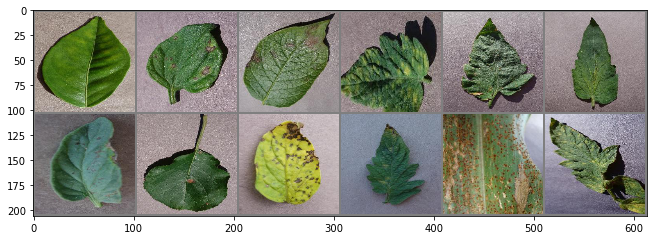

In [147]:
show_misclassified_images(misclassifiedLabels1)

In [148]:
low_accuracy_labels = [8, 17, 22, 30, 37]

In [149]:
top_3_mislabeled1 = top_misclassified_predicted_labels(confusion_matrix_report1, low_accuracy_labels)

In [150]:
list_top_3_mislabeled_count(low_accuracy_labels, top_3_mislabeled1, confusion_matrix_report1)

For label 8, Corn___Cercospora_leaf_spot Gray_leaf_spot, top three misclassified labels are:
---> Mislabeled: 10 Corn___Northern_Leaf_Blight
Count: 47
---> Mislabeled: 31 Tomato___Late_blight
Count: 7
---> Mislabeled: 9 Corn___Common_rust
Count: 6

For label 17, Peach___Bacterial_spot, top three misclassified labels are:
---> Mislabeled: 29 Tomato___Bacterial_spot
Count: 31
---> Mislabeled: 31 Tomato___Late_blight
Count: 24
---> Mislabeled: 0 Apple___Apple_scab
Count: 23

For label 22, Potato___Late_blight, top three misclassified labels are:
---> Mislabeled: 33 Tomato___Septoria_leaf_spot
Count: 21
---> Mislabeled: 31 Tomato___Late_blight
Count: 15
---> Mislabeled: 19 Pepper,_bell___Bacterial_spot
Count: 8

For label 30, Tomato___Early_blight, top three misclassified labels are:
---> Mislabeled: 31 Tomato___Late_blight
Count: 42
---> Mislabeled: 29 Tomato___Bacterial_spot
Count: 28
---> Mislabeled: 35 Tomato___Target_Spot
Count: 20

For label 37, Tomato___Tomato_mosaic_virus, top thre

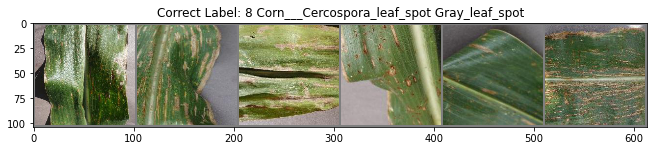

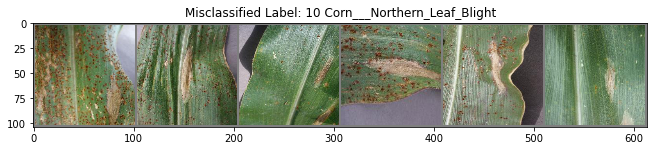

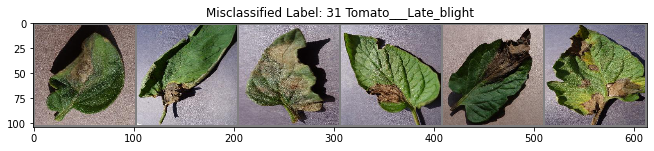

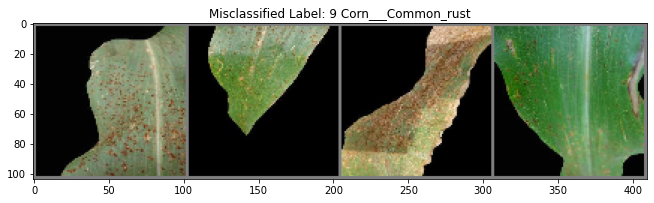

In [151]:
show_misclassified_images_per_labels(8, top_3_mislabeled1, misclassifiedLabels1)

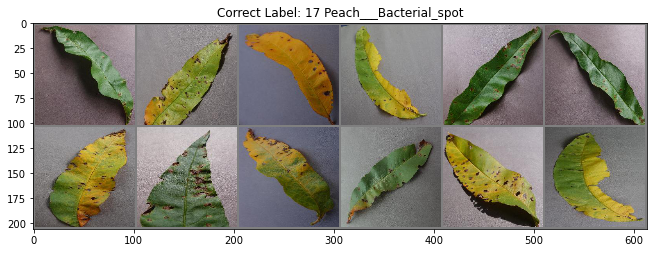

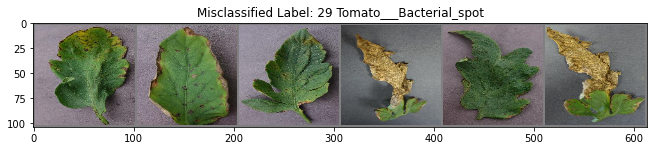

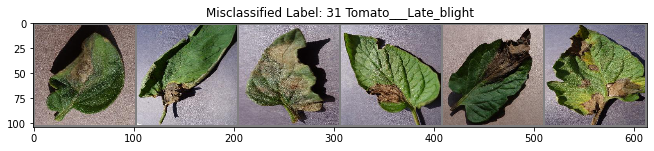

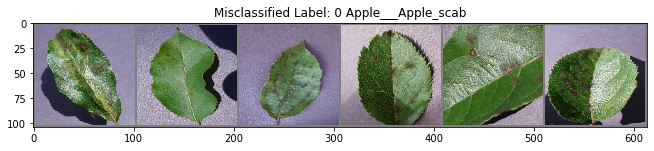

In [152]:
show_misclassified_images_per_labels(17, top_3_mislabeled1, misclassifiedLabels1)

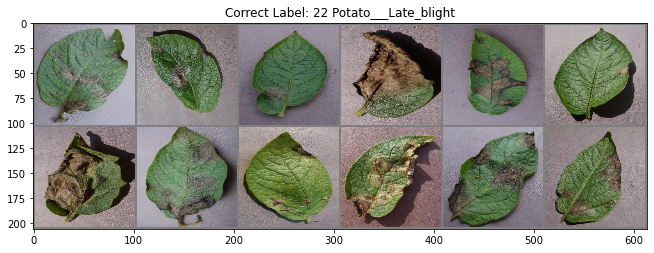

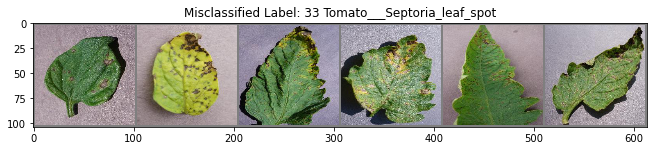

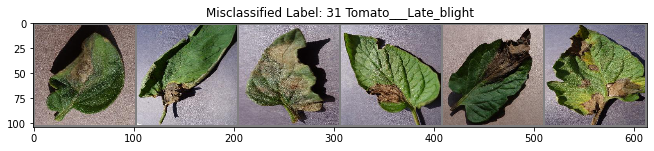

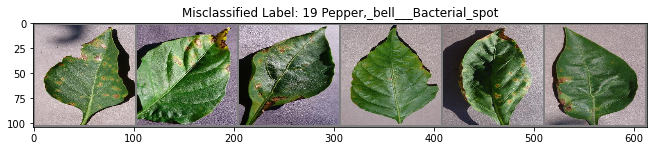

In [153]:
show_misclassified_images_per_labels(22, top_3_mislabeled1, misclassifiedLabels1)

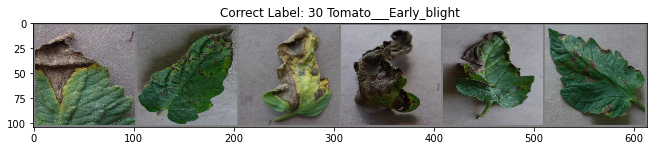

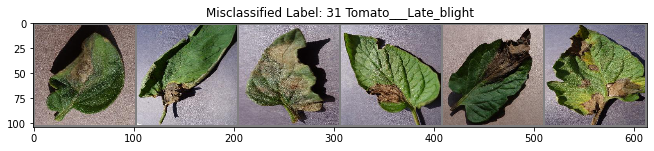

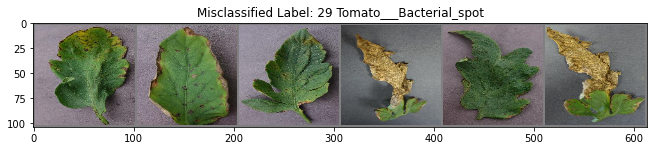

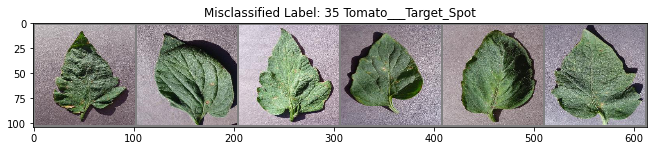

In [154]:
show_misclassified_images_per_labels(30, top_3_mislabeled1, misclassifiedLabels1)

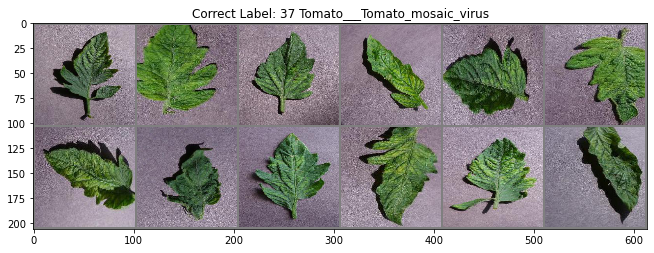

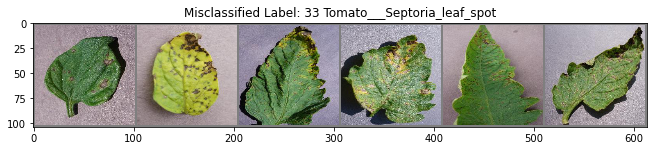

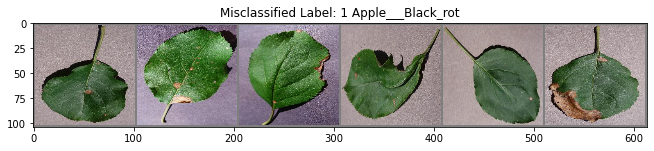

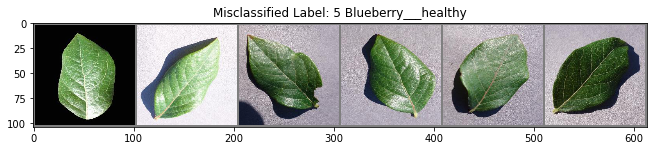

In [155]:
show_misclassified_images_per_labels(37, top_3_mislabeled1, misclassifiedLabels1)

#### Model 2

Correct Labels:   tensor([19, 10, 31, 34,  8, 19, 10, 12,  8, 19, 23, 29], dtype=torch.int32)
Predicted Labels: tensor([ 5,  8, 22, 35, 10,  3,  8, 13, 10, 22, 24, 36], dtype=torch.int32)

Correct Label: 19 --> Pepper,_bell___Bacterial_spot
Predicted Label: 5 --> Blueberry___healthy

Correct Label: 10 --> Corn___Northern_Leaf_Blight
Predicted Label: 8 --> Corn___Cercospora_leaf_spot Gray_leaf_spot

Correct Label: 31 --> Tomato___Late_blight
Predicted Label: 22 --> Potato___Late_blight

Correct Label: 34 --> Tomato___Spider_mites Two-spotted_spider_mite
Predicted Label: 35 --> Tomato___Target_Spot

Correct Label: 8 --> Corn___Cercospora_leaf_spot Gray_leaf_spot
Predicted Label: 10 --> Corn___Northern_Leaf_Blight

Correct Label: 19 --> Pepper,_bell___Bacterial_spot
Predicted Label: 3 --> Apple___healthy

Correct Label: 10 --> Corn___Northern_Leaf_Blight
Predicted Label: 8 --> Corn___Cercospora_leaf_spot Gray_leaf_spot

Correct Label: 12 --> Grape___Black_rot
Predicted Label: 13 --> Grape

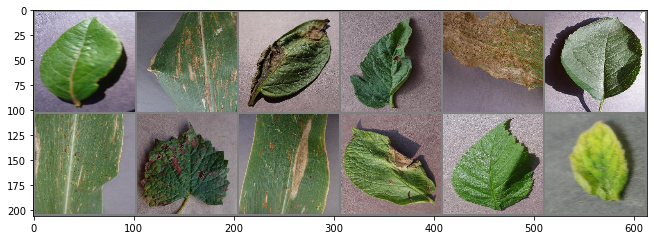

In [162]:
show_misclassified_images(misclassifiedLabels2)

In [157]:
low_accuracy_labels = [0, 30]

In [158]:
top_3_mislabeled2 = top_misclassified_predicted_labels(confusion_matrix_report2, low_accuracy_labels)

In [159]:
list_top_3_mislabeled_count(low_accuracy_labels, top_3_mislabeled2, confusion_matrix_report2)

For label 0, Apple___Apple_scab, top three misclassified labels are:
---> Mislabeled: 3 Apple___healthy
Count: 18
---> Mislabeled: 17 Peach___Bacterial_spot
Count: 13
---> Mislabeled: 16 Orange___Haunglongbing_(Citrus_greening)
Count: 4

For label 30, Tomato___Early_blight, top three misclassified labels are:
---> Mislabeled: 31 Tomato___Late_blight
Count: 29
---> Mislabeled: 29 Tomato___Bacterial_spot
Count: 4
---> Mislabeled: 32 Tomato___Leaf_Mold
Count: 3



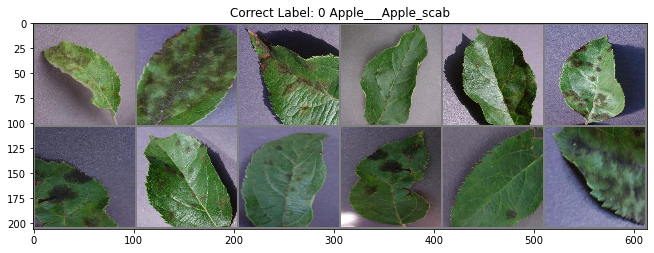

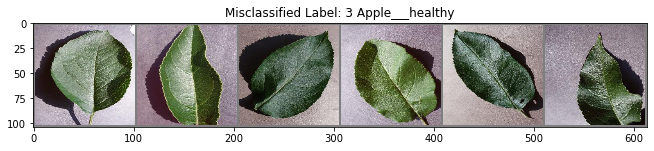

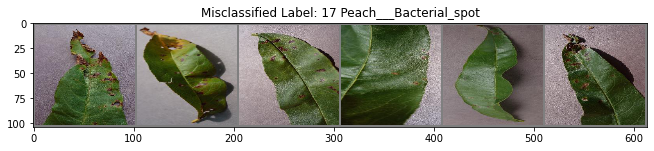

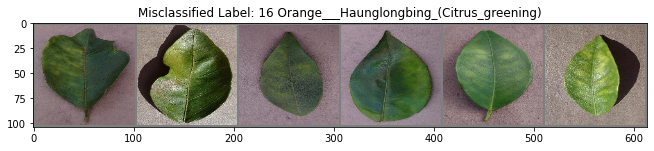

In [160]:
show_misclassified_images_per_labels(0, top_3_mislabeled2, misclassifiedLabels2)

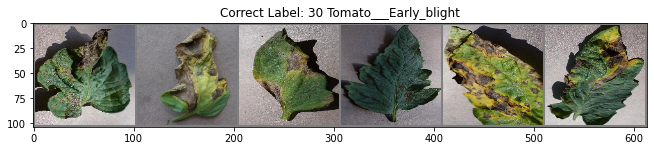

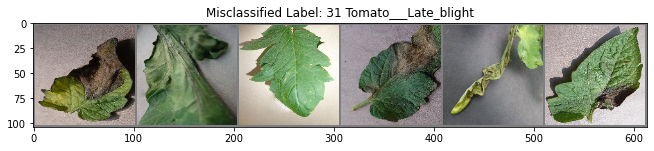

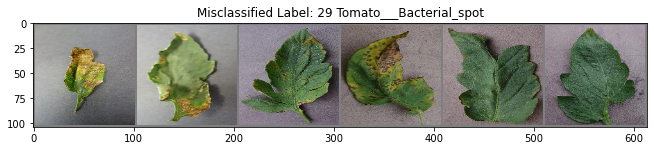

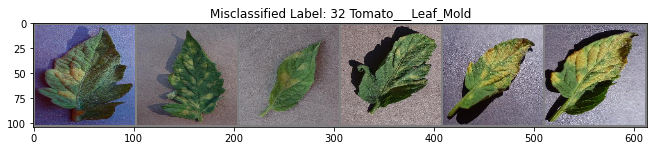

In [161]:
show_misclassified_images_per_labels(30, top_3_mislabeled2, misclassifiedLabels2)

#### Model 3

Correct Labels:   tensor([12, 36, 29, 20, 35, 30, 31, 37, 35, 33, 11,  8], dtype=torch.int32)
Predicted Labels: tensor([13, 29, 36, 25,  3, 34, 32, 34, 30, 30, 28, 11], dtype=torch.int32)

Correct Label: 12 --> Grape___Black_rot
Predicted Label: 13 --> Grape___Esca_(Black_Measles)

Correct Label: 36 --> Tomato___Tomato_Yellow_Leaf_Curl_Virus
Predicted Label: 29 --> Tomato___Bacterial_spot

Correct Label: 29 --> Tomato___Bacterial_spot
Predicted Label: 36 --> Tomato___Tomato_Yellow_Leaf_Curl_Virus

Correct Label: 20 --> Pepper,_bell___healthy
Predicted Label: 25 --> Soybean___healthy

Correct Label: 35 --> Tomato___Target_Spot
Predicted Label: 3 --> Apple___healthy

Correct Label: 30 --> Tomato___Early_blight
Predicted Label: 34 --> Tomato___Spider_mites Two-spotted_spider_mite

Correct Label: 31 --> Tomato___Late_blight
Predicted Label: 32 --> Tomato___Leaf_Mold

Correct Label: 37 --> Tomato___Tomato_mosaic_virus
Predicted Label: 34 --> Tomato___Spider_mites Two-spotted_spider_mite

Co

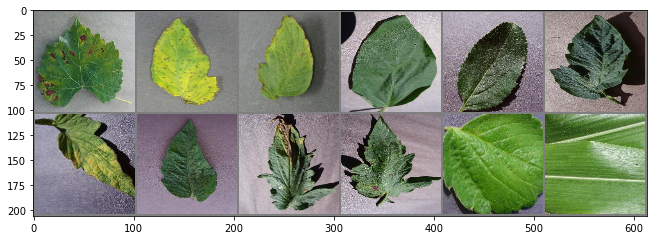

In [163]:
show_misclassified_images(misclassifiedLabels3)

In [165]:
low_accuracy_labels = [8]

In [166]:
top_3_mislabeled3 = top_misclassified_predicted_labels(confusion_matrix_report3, low_accuracy_labels)

In [167]:
list_top_3_mislabeled_count(low_accuracy_labels, top_3_mislabeled3, confusion_matrix_report3)

For label 8, Corn___Cercospora_leaf_spot Gray_leaf_spot, top three misclassified labels are:
---> Mislabeled: 10 Corn___Northern_Leaf_Blight
Count: 28
---> Mislabeled: 31 Tomato___Late_blight
Count: 1
---> Mislabeled: 11 Corn___healthy
Count: 1



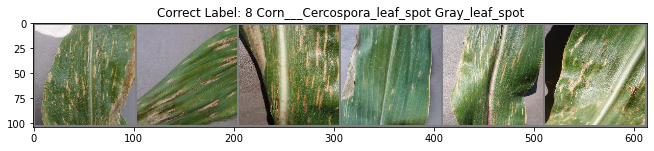

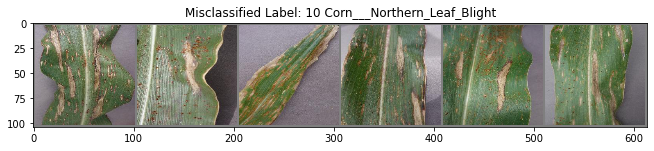

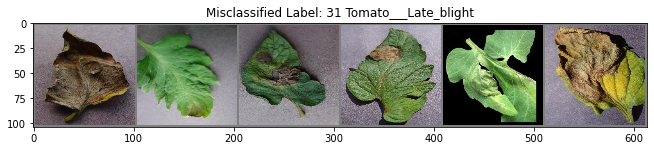

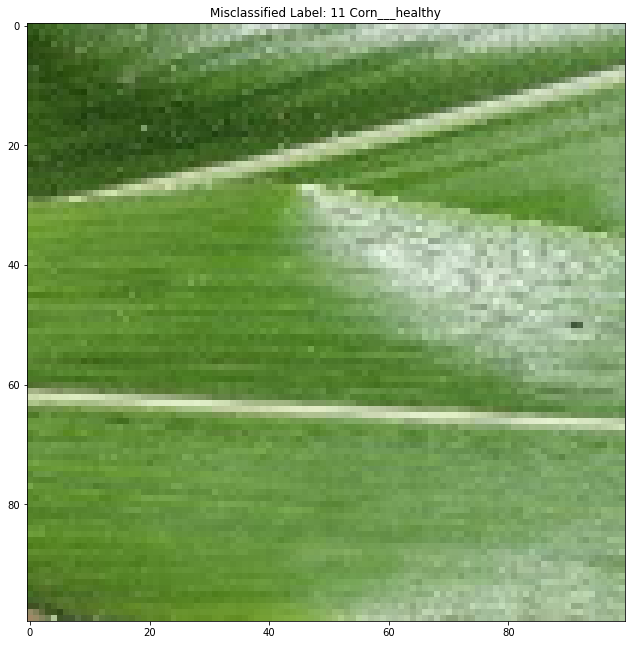

In [168]:
show_misclassified_images_per_labels(8, top_3_mislabeled3, misclassifiedLabels3)